# LU faktorizacija matrica

Sadržaj:

-  [Elementarne transformacije matrice](#Elementarne-transformacije-matrice)
-  [Trougaona dekompozicija](#Trougaona-dekompozicija)
-  [Operacijska složenost Dulitlovog algoritma](#Operacijska-složenost-Dulitlovog-algoritma)
-  [LDU faktorizacija](#LDU-faktorizacija)

## Elementarne transformacije matrice

Elementarne transformacije vrsta matrice:

- Zamena mesta dve vrste
- Množenje vrste brojem različitim od nule
- Sabiranje dve vrste

Navedene transformacije čuvaju prostor vrsta. Ova tvrdnja zasniva se na jednostavnim jednakostima:
\begin{align}
&\mathcal{L}(u,v)=\mathcal{L}(v,u),\\
&\mathcal{L}(v)=\mathcal{L}(\alpha v),\ \alpha\neq0,\\
&\mathcal{L}(u,v)=\mathcal{L}(u+v,v)
\end{align}

Isto se odnosi na kolone matrice. 

Elementarne transformacije kolona matrice:

- Zamena mesta dve kolone
- Množenje kolone brojem različitim od nule
- Sabiranje dve kolone

Navedene transformacije čuvaju prostor kolona matrice. Zaključujemo da elementarne transformacije čuvaju rang matrice.

Cilj primene elementarnih transformacija je dovođenje matrice na oblik iz koga se baza i dimenzija prostora vrsta ili kolona lako čitaju. To je [stepenasti oblik vrsta](https://en.wikipedia.org/wiki/Row_echelon_form) ili redukovani oblik vrsta i kolona. Postupak dovođenja matrice na stepenasti oblik je postupak eliminacije poznat i kao Gausova eliminacija. 

Elementarne transformacije vrsta matrice $A$ predstavljaju izvođenje specijalnih linearnih kombinacija vektora-vrsta koje čuvaju prostor $\mathcal{R}(A^T)$ te matrice.
Pokazali smo da se linearne kombinacije vrsta matrice $A$ mogu predstaviti matričnim množenjem nekom transformacionom matricom $T$ sa leve strane, tj. proizvod $TA$ dovodi do željenih promena unutar matrice $A.$ 

In [1]:
import numpy as np
import numpy.random as rndm
import scipy.linalg as spl
from timeit import default_timer as timer

**Primer 1.** Odredićemo prostor vrsta matrice $A=\begin{bmatrix}2&1&1&1&0\\4&3&1&3&3\\-2&-2&0&-1&-2\\5&2&2&5&5\end{bmatrix}.$
Za jednostavniji postupak izračunavanja koristićemo programski kod. 

In [2]:
A=np.array([[ 2.,  1,  1,  1,  0],
       [ 4,  3,  1,  3,  3],
       [-2, -2,  0, -1, -2],
       [ 5,  2,  2,  5,  5]])

U prvom koraku eliminacije anuliraju se elementi duž prve kolone matrice ispod glavne dijagonale. Da bi to bilo moguće neophodno je da element na prvoj poziciji bude različit od nule. Zbog toga ovaj element posebno ističemo i zovemo ga **pivot**. 

Za konkretnu matricu $A$ pivot je broj $2.$ Koristićemo Python indeksiranje. Koeficijente kojima se množi pivot vrsta dobijamo u količniku elemenata pivot kolone i samog pivota `A[1:,0]/A[0,0]`, što u konkretnom primeru daje koeficijente `[2,-1,5/2]`.
Anuliranje duž pivot kolone postiže se sledećim operacijama nad vrstama:
- `A[1,:]=A[1,:]-2*A[0,:]`
- `A[2,:]=A[2,:]+A[0,:]`
- `A[3,:]=A[3,:]-5/2*A[0,:]`

U obliku proizvoda i kroz adekvatno indeksiranje ove transformacije se beleže sa:
$$A[1:,:]=A[1:,:]-\begin{bmatrix}2\\-1\\5/2\end{bmatrix}A[0,:]$$

Iste transformacije dobijaju se i množenjem s leva matrice $A$ transformacionom matricom $T_1=\begin{bmatrix}1&0&0&0\\-2&1&0&0\\1&0&1&0\\-5/2&0&0&1\end{bmatrix}$ koja je rezultat primene navedenihe operacija nad vrstama jedinične matrice reda 4. Rezultati obavljenih transformacija čuvaće se unutar matrice $U.$

In [3]:
T1=np.array([[1.,0,0,0],[-2,1,0,0],[1,0,1,0],[-5/2,0,0,1]])
U=T1@A
print(U)

[[ 2.   1.   1.   1.   0. ]
 [ 0.   1.  -1.   1.   3. ]
 [ 0.  -1.   1.   0.  -2. ]
 [ 0.  -0.5 -0.5  2.5  5. ]]


U drugom koraku eliminacije anuliraju se elementi duž druge kolone matrice $U$ ispod njene glavne dijagonale. Pivot element ovog koraka je drugi dijagonalni element. Za matricu $A$ iz zadatka imamo:
- pivot iznosi $1,$
- koeficijenti su `A[2:,1]/A[1,1]=[-1,-0.5]`
- transformacije vrsta:
    - `A[2,:]=A[2,:]+A[1,:]`
    - `A[3,:]=A[3,:]+1/2*A[1,:]` 

U obliku proizvoda i kroz adekvatno indeksiranje ove transformacije su:
$$A[2:,:]=A[2:,:]-\begin{bmatrix}-1\\-1/2\end{bmatrix}A[1,:]$$
ili matričnim proizvodom $T_2U,$ gde je $T_2=\begin{bmatrix}1&0&0&0\\0&1&0&0\\0&1&1&0\\0&1/2&0&1\end{bmatrix}.$

In [4]:
T2=np.array([[1.,0,0,0],[0,1,0,0],[0,1,1,0],[0,1/2,0,1]])
U=T2@U
print(U)

[[ 2.   1.   1.   1.   0. ]
 [ 0.   1.  -1.   1.   3. ]
 [ 0.   0.   0.   1.   1. ]
 [ 0.   0.  -1.   3.   6.5]]


U trećem koraku pivot element je treći dijagonalni element matrice $U.$ S obzirom da je ovde konkretno to $0$ neophodno je da se pronađe neki drugi pivot element. Pretraga za njim obavlja se duž pivot kolone - treća kolona elemenata ispod glavne dijagonale. Dovođenje novog pivot elementa na dijagonalnu poziciju postiže se zamenom mesta treće i četvrte vrste, tj proizvodom  $PU$ gde je $P=\begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{bmatrix}$ permutaciona matrica.

In [5]:
P=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
U=P@U
print(U)

[[ 2.   1.   1.   1.   0. ]
 [ 0.   1.  -1.   1.   3. ]
 [ 0.   0.  -1.   3.   6.5]
 [ 0.   0.   0.   1.   1. ]]


Matrica je dovedena na trougaoni (stepenasti) oblik iz koga vidimo da su vrste matrice $A$ linearno nezavisne i predstavljaju jednu bazu odgovarajućeg prostora $\mathcal{R}(A^T).$ Još jednu bazu prostora $\mathcal{R}(A^T)$ čine npr. vrste trougaone matrice $U.$ Do matrice $U$ dolazi se transformacijama
$$PT_2T_1A=U.$$ Matrica $U$ je punog ranga vrsta, tj. ${\rm rang}(U)=4={\rm rang}(A),$ ${\rm def}(A^T)=0,$ ${\rm def}(A)=1.$ 

S obzirom da su sve matrice $P,T_2,T_1$ regularne, važi
$$A=(PT_2T_1)^{-1}U=T_1^{-1}T_2^{-1}P^{-1}U=T_1^{-1}T_2^{-1}P^{T}U=L_1L_2P^{T}U.$$
Zbog toga ispitaćemo detaljnije faktore u dobijenom proizvodu.

Inverzne matrice trougaonih matrica $T_1$ i $T_2$ su sigurno trougaone matrice istog tipa. Međutim, važe i sledeće relacije.
\begin{align}
&T_1=\left[\begin{array}{c|ccc}1&0&0&0\\ \hline-2&1&0&0\\1&0&1&0\\-5/2&0&0&1\end{array}\right]&&
T_1^{-1}=L_1=\left[\begin{array}{c|ccc}1&0&0&0\\ \hline2&1&0&0\\-1&0&1&0\\5/2&0&0&1\end{array}\right],\\
&T_1,\ L_1\mbox{ trougaone matrice imaju blok oblik} &&
\left[\begin{array}{c|c}I_1&O_{1\times3}\\ \hline M_{3\times1}&I_3\end{array}\right].\\
&T_2=\left[\begin{array}{cc|cc}1&0&0&0\\0&1&0&0\\ \hline 0&1&1&0\\0&1/2&0&1\end{array}\right]&&
T_2^{-1}=L_2=\left[\begin{array}{cc|cc}1&0&0&0\\0&1&0&0\\ \hline0&-1&1&0\\0&-1/2&0&1\end{array}\right],\\
&\mbox{ove trougaone matrice imaju blok oblik} &&
\left[\begin{array}{c|c}I_2&O_{2\times2}\\ \hline M_{2\times 2}&I_2\end{array}\right].\\
&L_1L_2=\left[\begin{array}{cc|cc}1&0&0&0\\2&1&0&0\\ \hline-1&-1&1&0\\5/2&-1/2&0&1\end{array}\right],
&&P=\left[\begin{array}{cc|cc}1&0&0&0\\0&1&0&0\\ \hline0&0&0&1\\0&0&1&0\end{array}\right].
\end{align}

In [6]:
L1=np.array([[1.,0,0,0],[2,1,0,0],[-1,0,1,0],[5/2,0,0,1]])
L1@T1

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [7]:
L2=np.array([[1.,0,0,0],[0,1,0,0],[0,-1,1,0],[0,-1/2,0,1]])
L2@T2

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [8]:
L=L1@L2
L

array([[ 1. ,  0. ,  0. ,  0. ],
       [ 2. ,  1. ,  0. ,  0. ],
       [-1. , -1. ,  1. ,  0. ],
       [ 2.5, -0.5,  0. ,  1. ]])

In [9]:
L@P.T

array([[ 1. ,  0. ,  0. ,  0. ],
       [ 2. ,  1. ,  0. ,  0. ],
       [-1. , -1. ,  0. ,  1. ],
       [ 2.5, -0.5,  1. ,  0. ]])

Prikazani primer je potvrdio da se Gausov postupak eliminacije može u potpunosti da opiše matričnim množenjem gde su činioci jedna donje trougaona matrica, jedna gornje trougaona i jedna permutaciona matrica. S obzirom da je Gausova eliminacija postupak koji se pojavljuje u više različitih zadataka: rešavanje sistema linearnih jednačina, izračunavanje determinante i određivanje ranga, pronađeni faktori su matrični zapis ovih algoritama. 

**Primer 2.** Za date matrice $L$ i $U$ odredićemo $A=LU$ i $\det(A).$
	
a) $ L=\begin{bmatrix}1&0&0\\-1&1&0\\2&0&3\end{bmatrix}, 
	U=\begin{bmatrix}3/5&2&1\\0&1&-3\\0&0&7\end{bmatrix};$
    
b) $ L=\begin{bmatrix}1&0&0&0\\2&1&0&0\\-2&0&3&0\\1&2&3&4\end{bmatrix}, 
	U=\begin{bmatrix}-1&2&1&4\\0&1&1&-2\\0&0&3&4\\0&0&0&-1\end{bmatrix}.$    

a) Na osnovu Koši-Bineove formule znamo da je $\det(A)=\det(L)\det(U)=3\cdot\frac{21}5=\frac{63}5.$

In [10]:
L=np.array([[  1., 0,  0],
       [ -1, 1, 0],
       [ 2,  0, 3.]])
U=np.array([[ 3/5, 2, 1],
       [0, 1, -3],
       [ 0,  0, 7.]])
L@U

array([[ 0.6,  2. ,  1. ],
       [-0.6, -1. , -4. ],
       [ 1.2,  4. , 23. ]])

b) $\det(A)=\det(L)\det(U)=12\cdot3=36.$

In [11]:
L=np.array([[  1., 0,  0, 0],
       [ 2, 1, 0, 0],
       [ -2,  0, 3., 0],
       [ 1, 2, 3, 4]])
U=np.array([[ -1, 2, 1 , 4],
       [0, 1, 1, -2],
       [ 0,  0, 3. , 4],
       [0, 0, 0, -1]])
L@U

array([[-1.,  2.,  1.,  4.],
       [-2.,  5.,  3.,  6.],
       [ 2., -4.,  7.,  4.],
       [-1.,  4., 12.,  8.]])

Poznavanje trougaonih činilaca u razlaganju matrice zovemo njena trougaona dekompozicija. Trougaona dekompozicija koja je direktna posledica Gausove eliminacije se prepoznaje po donje trougaonoj matrici čiji su svi dijagonalni elementi jednaki $1$ - unitrougaona matrica. Ovakvu trougaonu dekompoziciju još specijalno zovemo i Dulitlova dekompozicija.

## Trougaona dekompozicija

Neka je $A=\begin{bmatrix} a_{11}&a_{12}&\dots&a_{1n}\\
a_{21}&a_{22}&\dots&a_{2n}\\
\vdots&\vdots&\ddots&\vdots\\a_{n1}&a_{n2}&\dots&a_{nn}\end{bmatrix}$ realna kvadratna matrica čiju trougaonu dekompoziciju tražimo.  Postupak dovođenja na trougaoni oblik možemo posmatrati kao iterativnu proceduru sukcesivnog predstavljanja matrice $A$ u obliku proizvoda 
 $$A=L_1U_1=L_1L_2U_2=\dots=L_1L_2\cdots L_{n-1}U_{n-1},$$
 gde su $L_k$ donje trougaone matrice, a $U_k$ je blok gornje trougaona matrica.
 Rezultat jedne iteracije jeste da se matrica $A$  opisuje proizvodom donje trougaone matrice $L_1L_2\cdots L_k$ i blok gornje trougaone matrice $U_k.$ Cilj je da se kroz iteracije $U_k$ matrica $A$ dovede na gornje trougaoni oblik $U_{n-1}=U.$ Dakle, matrica $L_k$ vrši popravljanje matrice $U_{k-1}$ u $U_k,$ prelaskom sa blok trougaone ka trougaonoj matrici. Na kraju postupka je
$$M=LU,\qquad  L=L_1L_2\cdots L_{n-1},\quad U=U_{n-1}.$$
<div>
   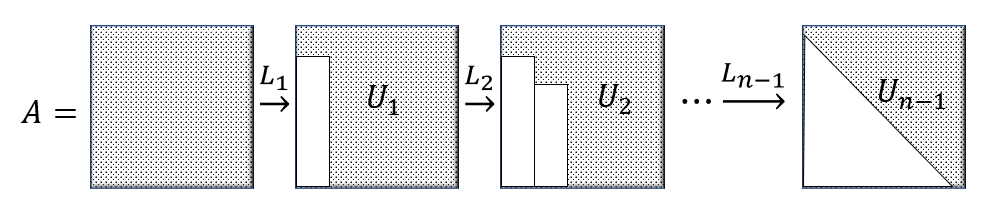  
</div>

Opisaćemo prvi korak LU faktorizacije matrice $A$. On se sastoji od eliminacije elemenata prve kolone ispod glavne dijagonale pomoću pivot elementa $a_{11}.$ Vrsta u kojoj se nalazi pivot element zovemo pivot-vrsta. Prvi korak je postupak prelaska $A\to U_1,$ šematski prikazan sa:
$$L_1^{-1}A=\begin{bmatrix} 1&0&0&\dots&0\\
-\frac{a_{21}}{a_{11}}&1&0&\dots&0\\ \vdots\\
-\frac{a_{n1}}{a_{11}}&0&0&\dots&1\end{bmatrix}\begin{bmatrix} a_{11}&a_{12}&\dots&a_{1n}\\
a_{21}&a_{22}&\dots&a_{2n}\\
&&\vdots&\\a_{n1}&a_{n2}&\dots&a_{nn}\end{bmatrix}=
\begin{bmatrix} a_{11}&a_{12}&\dots&a_{1n}\\
0&a_{22}'&\dots&a_{2n}'\\
&&\vdots&\\0&a_{n2}'&\dots&a_{nn}'\end{bmatrix}=U_1.$$ 

Na osnovu blok forme znamo da je $L_1=\begin{bmatrix} 1&0&0&\dots&0\\
\frac{a_{21}}{a_{11}}&1&0&\dots&0\\ \vdots\\
\frac{a_{n1}}{a_{11}}&0&0&\dots&1\end{bmatrix}=
\left[\begin{array}{c|c}I_1&\begin{array}{ccc}0&\dots&0\end{array}\\\hline
\begin{array}{c}l_{21}\\\vdots\\l_{n1}\end{array}&I_{n-1}
\end{array}\right].$
U prvom koraku generišu se jedna kolona matrice $L$ i jedna vrsta matrice $U:$ 
\begin{align}
    A&=L_1U_1=\begin{bmatrix} 1&0&0&\dots&0\\
l_{21}&1&0&\dots&0\\ \vdots\\
l_{n1}&0&0&\dots&1\end{bmatrix}
\begin{bmatrix} a_{11}&a_{12}&\dots&a_{1n}\\
0&a_{22}'&\dots&a_{2n}'\\
&&\vdots&\\0&a_{n2}'&\dots&a_{nn}'\end{bmatrix}
=\left[\begin{array}{c|c}I_1&\begin{array}{ccc}0&\dots&0\end{array}\\\hline
\begin{array}{c}l_{21}\\\vdots\\l_{n1}\end{array}&I_{n-1}
\end{array}\right]\left[\begin{array}{c|c}a_{11}&\begin{array}{ccc}a_{12}&\dots&a_{1n}\end{array}\\\hline
\begin{array}{c}0\\\vdots\\0\end{array}&A_{(n-1)\times(n-1)}
\end{array}\right].
\end{align}
Koeficijenti kojima se pivot vrsta množi u postupku eliminacije obrazuju prvu kolonu matrice $L.$ Pivot vrsta predstavlja prvu vrstu matrice $U.$
<div>
   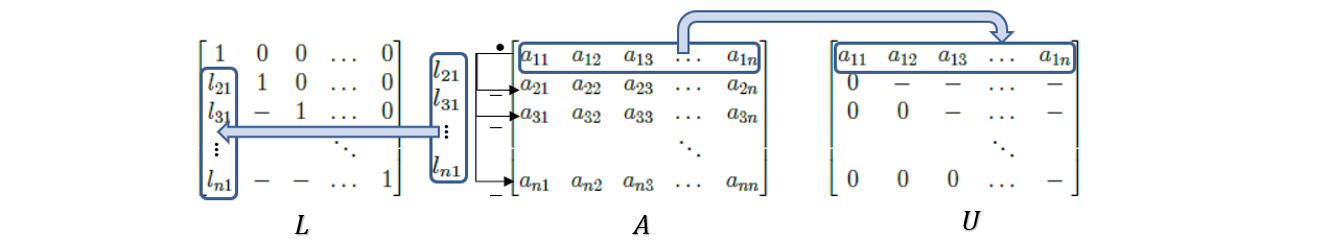  
</div>

Blok oblik matrica $L_1$ i $U_1$ je veoma bitan jer se njime uspostavlja veza sa narednim korakom LU faktorizacije. Trougaona faktorizacija matrice $A$ se u narednom koraku prenosi na blok $A_{(n-1)\times(n-1)}.$ Naime, ako je poznata LU dekompozicija matrice $A_{(n-1)\times(n-1)}=L_{(n-1)\times(n-1)}U_{(n-1)\times(n-1)},$ tada je
$$U_1=\left[\begin{array}{c|c}a_{11}&\begin{array}{ccc}a_{12}&\dots&a_{1n}\end{array}\\\hline
\begin{array}{c}0\\\vdots\\0\end{array}&A_{(n-1)\times(n-1)}
\end{array}\right]=\left[\begin{array}{c|c}a_{11}&\begin{array}{ccc}a_{12}&\dots&a_{1n}\end{array}\\\hline
\begin{array}{c}0\\\vdots\\0\end{array}&L_{(n-1)\times(n-1)}U_{(n-1)\times(n-1)}
\end{array}\right]=
\left[\begin{array}{c|c}1&\begin{array}{ccc}0&\dots&0\end{array}\\\hline
\begin{array}{c}0\\\vdots\\0\end{array}&L_{(n-1)\times(n-1)}
\end{array}\right]\left[\begin{array}{c|c}a_{11}&\begin{array}{ccc}a_{12}&\dots&a_{1n}\end{array}\\\hline
\begin{array}{c}0\\\vdots\\0\end{array}&U_{(n-1)\times(n-1)}
\end{array}\right].$$
To se prenosi na LU faktorizaciju matrice $A:$ 
\begin{align}
A&=L_1U_1=\left[\begin{array}{c|c}1&\begin{array}{ccc}0&\dots&0\end{array}\\\hline
\begin{array}{c}l_{21}\\\vdots\\l_{n1}\end{array}&I_{n-1}
\end{array}\right]\left[\begin{array}{c|c}a_{11}&\begin{array}{ccc}a_{12}&\dots&a_{1n}\end{array}\\\hline
\begin{array}{c}0\\\vdots\\0\end{array}&A_{(n-1)\times(n-1)}
\end{array}\right]\\
&=\left[\begin{array}{c|c}1&\begin{array}{ccc}0&\dots&0\end{array}\\\hline
\begin{array}{c}l_{21}\\\vdots\\l_{n1}\end{array}&I_{n-1}
\end{array}\right]\left[\begin{array}{c|c}1&\begin{array}{ccc}0&\dots&0\end{array}\\\hline
\begin{array}{c}0\\\vdots\\0\end{array}&L_{(n-1)\times(n-1)}
\end{array}\right]\left[\begin{array}{c|c}a_{11}&\begin{array}{ccc}a_{12}&\dots&a_{1n}\end{array}\\\hline
\begin{array}{c}0\\\vdots\\0\end{array}&U_{(n-1)\times(n-1)}
\end{array}\right]\\
&=\left[\begin{array}{c|c}1&\begin{array}{ccc}0&\dots&0\end{array}\\\hline
\begin{array}{c}l_{21}\\\vdots\\l_{n1}\end{array}&L_{(n-1)\times(n-1)}
\end{array}\right]\left[\begin{array}{c|c}a_{11}&\begin{array}{ccc}a_{12}&\dots&a_{1n}\end{array}\\\hline
\begin{array}{c}0\\\vdots\\0\end{array}&U_{(n-1)\times(n-1)}
\end{array}\right]=LU.
\end{align}
Drugim rečima, LU faktorizacija se sa svakom iteracijom odvija kroz operacijski isti korak samo nad matricom dimenzije za jedan manje. Postupak umanjenja dimenzije sprovodi se sve do matrice dimenzije 1. Tu se postupak završava, tj. ne sprovodi se LU faktorizacija matrice dimenzije 1.

Prilikom svakog od koraka faktorizacije formiraju se nova kolona matrice $L$ i nova vrsta matrice $U$ kao što je šematski prikazano sledećom slikom.
<div>
   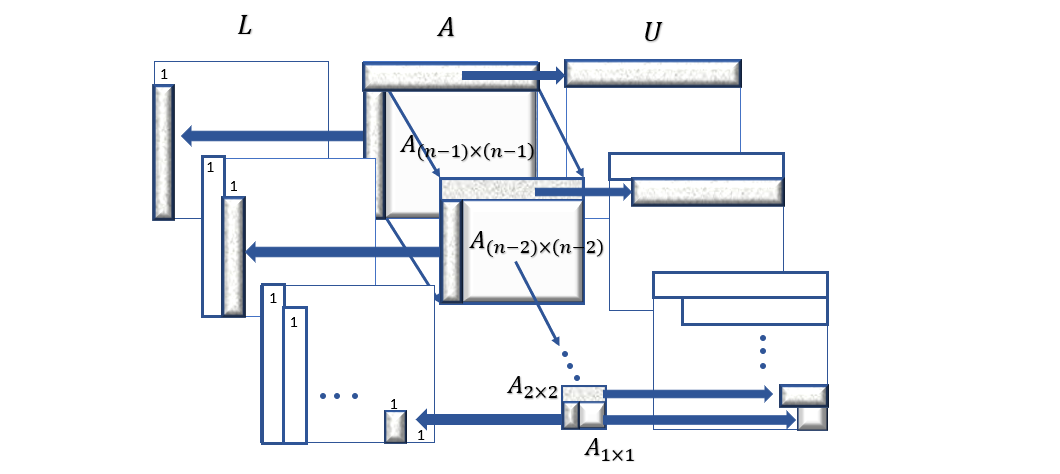  
</div>

**Primer 3.** Odredićemo trougaonu dekompoziciju matrice $$A=\begin{bmatrix}2&-1&1&2\\
	-2&0&1&-5\\4&-2&3&5\\6&-1&0&9\end{bmatrix}.$$
    
Na početku matrice $L$ i $U$ se postavljaju na $L=I,$ $U=A.$ 

In [12]:
A=np.array([[2.,-1.,1.,2.],[-2,0,1,-5],[4,-2,3,5],[6,-1,0,9]])
m,n=A.shape
L=np.eye(m)
U=A.copy()
print(L)
print(U)
U is A

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[ 2. -1.  1.  2.]
 [-2.  0.  1. -5.]
 [ 4. -2.  3.  5.]
 [ 6. -1.  0.  9.]]


False

In [13]:
for i in range(m-1):
    L[i+1:,i]=U[i+1:,i]/U[i,i]
    U[i+1:,:]-=np.outer(L[i+1:,i],U[i,:])

print(L)
print(U)    

[[ 1.  0.  0.  0.]
 [-1.  1.  0.  0.]
 [ 2. -0.  1.  0.]
 [ 3. -2.  1.  1.]]
[[ 2. -1.  1.  2.]
 [ 0. -1.  2. -3.]
 [ 0.  0.  1.  1.]
 [ 0.  0.  0. -4.]]


In [14]:
A-L@U

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Za izvođenje LU faktorizacije Python poseduje ugrađenu funkciju unutar paketa Scipy.linalg. Iskoristićemo je za izračunavanje LU faktorizacije matrice $A.$
Izlaz ugrađene naredbe `lu` daje permutacionu matricu $P$ tako da odgovara jednakosti $A=PLU.$   

In [15]:
P,L,U=spl.lu(A)

In [16]:
print(P)
print(L)
print(U)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[ 1.          0.          0.          0.        ]
 [ 0.66666667  1.          0.          0.        ]
 [ 0.33333333  0.5         1.          0.        ]
 [-0.33333333  0.25       -0.5         1.        ]]
[[ 6.         -1.          0.          9.        ]
 [ 0.         -1.33333333  3.         -1.        ]
 [ 0.          0.         -0.5        -0.5       ]
 [ 0.          0.          0.         -2.        ]]


Vidimo da se dobijene trougaone matrice razlikuju od onih koje su izvedene polaznim algoritmom. Proverimo tačnost dobijenih informacija, tj. da li zaista važi jednakost $A=PLU.$

In [27]:
A-P@L@U

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Do razlike u rezultatima faktorizacije dolazi zbog strategije izbora pivot elementa koja se sprovodi za izračunavanja u konačnoj preciznosti. Tako permutaciona matrica $P$ u izlazu naredbe `lu` ukazuje da je za prvi pivot element izabran broj $6$ kao najveća vrednost unutar prve kolone matrice $A.$ Na sličan način su birani i preostali pivot elementi faktorizacije. Čitamo ih sa dijagonale matrice $U.$

Ispostavlja se da izbor pivot elementa u implementaciji algoritma ima veoma važnu ulogu u održanju tačnosti rezultata, pa zbog toga predstavlja veoma važan aspekt u implementaciji algoritma.  Algoritmi numeričke matematike predstavljaju kompromis između brzog i tačnog rešenja problema. Trougaona dekompozicija nije izuzetak u tome. Prilikom izračunavanja u konačnoj preciznosti ključ za postizanje zadovoljavajuće tačnosti  leži u izbegavanju rada brojevima koji su velikog reda veličine ili brojevima  koji se razlikuju za velike redove veličina. Veoma često da bi se ispunio ovaj cilj potrebno je izbeći male vrednosti, preciznije deljenje malim brojevima. Zbog toga,
osnovni problem prilikom izvođenja algoritma $LU$ dekompozicije jeste nula ili veoma mala vrednost pivot elementa u nekom iterativnom koraku. 
U takvoj situaciji strategija koja se najčešće sprovodi je [delimični izbor pivot elementa](http://mathonline.wikidot.com/partial-pivoting-in-gaussian-elimination). Ona podrazumeva zamenu mesta vrsta  matrice $A$ sa ciljem postavljanja bolje vrednosti na pivot poziciju. Kod implementacije na računaru,  izbor pivot elementa znači postavljanje na pivot poziciju broja sa maksimalnim modulom, tj. maksimalnom apsolutnom vrednošću. Time se obezbeđuje stabilnost izračunavanja u aritmetici konačne preciznosti. Stabilnost znači da izlazne vrednosti algoritma ne nose greške većeg reda veličine od onih koje su došle sa ulaznim vrednostima.

Uporedićemo rezultat ugrađene funkcije i koda sa izborom pivot elementa.

In [28]:
m,n=A.shape
L=np.eye(m)
P=np.arange(m)  #praćenje permutacija vrsta u vektoru
U=A.copy()
for i in range(m-1):
    j=np.argmax(np.abs(U[i:,i]))+i  #indeks najvećeg elementa kolone podmatrice
    if j!=i:
        U[[i,j],:]=U[[j,i],:]    #zamena vrsta matrice U
        L[[i,j],:i]=L[[j,i],:i]  #zamena vrsta u bloku matrice L
        P[i],P[j]=P[j],P[i]      #beleženje permutacije vrsta
    if U[i,i]!=0:        
        L[i+1:,i]=U[i+1:,i]/U[i,i]
        U[i+1:,:]-=np.outer(L[i+1:,i],U[i,:])

print(L)
print(U) 

[[ 1.          0.          0.          0.        ]
 [ 0.66666667  1.          0.          0.        ]
 [ 0.33333333  0.5         1.          0.        ]
 [-0.33333333  0.25       -0.5         1.        ]]
[[ 6.         -1.          0.          9.        ]
 [ 0.         -1.33333333  3.         -1.        ]
 [ 0.          0.         -0.5        -0.5       ]
 [ 0.          0.          0.         -2.        ]]


In [29]:
A[P]-L@U

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Analiziraćemo uticaj pivot pretrage na informacije koje $LU$ faktorizacija čuva.
Pretpostavimo da je u iteracijama Dulitlovog algoritma dobijeno razlaganje matrice 
$$A=L_kU_k=\left[\begin{array}{c|c}L_{k\times k}&O_{k\times(n-k)}\\ \hline B_{(n-k)\times k}&I_{n-k}\end{array}\right]\left[\begin{array}{c|c}U_{k\times k}&C_{k\times(n-k)}\\ \hline O_{(n-k)\times k}&A_{(n-k)\times(n-k)}\end{array}\right],$$ 
gde je $L_{k\times k}$ donja unitrougaona matrica, a  $U_{k\times k}$ gornje trougaona matrica. U narednoj iteraciji započinje se faktorizacija bloka $A_{(n-k)\times(n-k)}.$ U slučaju kada se na prvoj poziciji bloka $A_{(n-k)\times(n-k)}$ nalazi neadekvatna pivot vrednost mora da se napravi pretraga za boljom vrednošću. Delimična pretraga za pivot elementom znači traženje nove pivot vrednosti unutar prve kolone bloka $A_{(n-k)\times(n-k)}.$ Ukoliko takva vrednost postoji potrebno je dovesti celu pivot vrstu na odgovarajuću poziciju. Ta pozicija je prva vrsta bloka $A_{(n-k)\times(n-k)}\equiv A_{n-k}.$ Označimo sa $$P=\left[\begin{array}{c|c}I_k&O_{k\times(n-k)}\\ \hline O_{(n-k)\times k}&P_{n-k}\end{array}\right]$$ permutacionu matricu koja će izvršiti odgovarajuću zamenu mesta vrsta. 

\begin{align}
A&=\left[\begin{array}{c|c}L_{k\times k}&O_{k\times(n-k)}\\ \hline B_{(n-k)\times k}&I_{n-k}\end{array}\right]
\left[\begin{array}{c|c}U_{k\times k}&C_{k\times(n-k)}\\ \hline O_{(n-k)\times k}&A_{n-k}\end{array}\right]\\
&=\left[\begin{array}{c|c}L_{k\times k}&O_{k\times(n-k)}\\ \hline B_{(n-k)\times k}&P_{n-k}^TP_{n-k}\end{array}\right]
\left[\begin{array}{c|c}U_{k\times k}&C_{k\times(n-k)}\\ \hline O_{(n-k)\times k}&A_{n-k}\end{array}\right]\\
%&=\left[\begin{array}{c|c}L_{k\times k}&O_{k\times(n-k)}\\ \hline B_{(n-k)\times k}&P_{n-k}^T\end{array}\right] \left[\begin{array}{c|c}I_k&O_{k\times(n-k)}\\ \hline O_{(n-k)\times k}&P_{n-k}\end{array}\right] \left[\begin{array}{c|c}U_{k\times k}&C_{k\times(n-k)}\\ \hline O_{(n-k)\times k}&A_{n-k}\end{array}\right]\\
&=\left[\begin{array}{c|c}L_{k\times k}&O_{k\times(n-k)}\\ \hline P_{n-k}^TP_{n-k}B_{(n-k)\times k}&P_{n-k}^T\end{array}\right]
\left[\begin{array}{c|c}U_{k\times k}&C_{k\times(n-k)}\\ \hline O_{(n-k)\times k}&P_{n-k}A_{n-k}\end{array}\right]\\
&=\left[\begin{array}{c|c}I_k&O_{k\times(n-k)}\\ \hline O_{(n-k)\times k}&P_{n-k}^T\end{array}\right]
\left[\begin{array}{c|c}L_{k\times k}&O_{k\times(n-k)}\\ \hline P_{n-k}B_{(n-k)\times k}&I_{n-k}\end{array}\right]
\left[\begin{array}{c|c}U_{k\times k}&C_{k\times(n-k)}\\ \hline O_{(n-k)\times k}&P_{n-k}A_{n-k}\end{array}\right]
\end{align}
$$\Longleftrightarrow\  \left[\begin{array}{c|c}I_k&O_{k\times(n-k)}\\ \hline O_{(n-k)\times k}&P_{n-k}\end{array}\right]A=\left[\begin{array}{c|c}L_{k\times k}&O_{k\times(n-k)}\\ \hline P_{n-k}B_{(n-k)\times k}&I_{n-k}\end{array}\right]
\left[\begin{array}{c|c}U_{k\times k}&C_{k\times(n-k)}\\ \hline O_{(n-k)\times k}&P_{n-k}A_{n-k}\end{array}\right].$$
Zaključujemo da zamena mesta vrsta u nekom koraku faktorizacije povlači istu zamenu vrsta i u polaznoj matrici $A$ i u bloku trougaone matrice $L_k.$

U specijalnim situacijama pretraga za pivot elementom može da uključi sve elemente bloka nad kojim se sprovodi korak LU algoritma. To podrazumeva i permutaciju kolona matrice A. Takvu strategiju izbora nazivamo potpun izbor pivot elementa, ili kompletno pivotiranje, i rezultujuća faktorizacija je oblika
$$PAQ=LU,$$
gde su $P$ i $Q$ neke permutacione matrice. Ovakav način izbora pivot elementa koristi se veoma retko jer je izvođenje pretrage tada najveće vremensko opterećenje algoritma.

Narednim primerom pokazaćemo važnost pivot strategije. 

**Primer 4.** Odredićemo LU faktorizaciju matrice $A=\begin{bmatrix}0.1&0.2&0.3\\0.4&0.5&0.6\\
0.7&0.8&0.8999\end{bmatrix}$ sa i bez izbora pivot elementa. Radićemo matricom male dimenzije. Da bismo simulirali greške rada u konačnoj preciznosti svi međurezultati biće zaokruženi na tri decimale, tj. kreiraćemo računsku mašinu radne preciznosti 3 decimalna mesta.

Inače LU faktorizacija matrice $A$ bez izbora pivot elementa, u apsolutnoj tačnosti je
\begin{align}
\begin{bmatrix}0.1&0.2&0.3\\0.4&0.5&0.6\\
0.7&0.8&0.8999\end{bmatrix}
=\begin{bmatrix}1&0&0\\4&1&0\\ 7&2&1\end{bmatrix}
\begin{bmatrix}0.1&0.2&0.3\\0&-0.3&-0.6\\
0&0&-0.0001\end{bmatrix}.
\end{align}

In [50]:
A=np.array([[0.1,0.2,0.3],[0.4,0.5,0.6],[0.7,0.8,0.8999]])
U=A.copy()
L=np.eye(3)

In [51]:
L[1:,0]=np.round(U[1:,0]/U[0,0], decimals=3)
U[1:,:]=np.round(U[1:,:]-np.outer(L[1:,0],U[0,:]), decimals=3)
print(L)
print(U)

[[1. 0. 0.]
 [4. 1. 0.]
 [7. 0. 1.]]
[[ 0.1  0.2  0.3]
 [ 0.  -0.3 -0.6]
 [-0.  -0.6 -1.2]]


In [52]:
L[2:,1]=np.round(U[2:,1]/U[1,1], decimals=3)
U[2:,:]=np.round(U[2:,:]-np.outer(L[2:,1],U[1,:]), decimals=3)
print(L)
print(U)

[[1. 0. 0.]
 [4. 1. 0.]
 [7. 2. 1.]]
[[ 0.1  0.2  0.3]
 [ 0.  -0.3 -0.6]
 [-0.   0.   0. ]]


Dobijeni rezultat za matricu $U$ sugeriše da je ona ranga 2, tj. da je singularna matrica.

Primenimo sada pivot strategiju kojom se za pivot bira najveći po apsolutnoj vrednosti broj u koloni.

In [33]:
U=A.copy()
L=np.eye(3)
P1=np.eye(3)
P1[[0,2],:]=P1[[2,0],:]
U=P1@U
L=P1@L@np.transpose(P1)
print(U)
print(P1)

[[0.7    0.8    0.8999]
 [0.4    0.5    0.6   ]
 [0.1    0.2    0.3   ]]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [34]:
L[1:,0]=np.round(U[1:,0]/U[0,0], decimals=3)
U[1:,:]=np.round(U[1:,:]-np.outer(L[1:,0],U[0,:]), decimals=3)
print(L)
print(U)

[[1.    0.    0.   ]
 [0.571 1.    0.   ]
 [0.143 0.    1.   ]]
[[ 0.7     0.8     0.8999]
 [ 0.      0.043   0.086 ]
 [-0.      0.086   0.171 ]]


In [35]:
L[2:,1]=np.round(U[2:,1]/U[1,1], decimals=3)
U[2:,:]=np.round(U[2:,:]-np.outer(L[2:,1],U[1,:]), decimals=3)
print(L)
print(U)

[[1.    0.    0.   ]
 [0.571 1.    0.   ]
 [0.143 2.    1.   ]]
[[ 0.7     0.8     0.8999]
 [ 0.      0.043   0.086 ]
 [-0.      0.     -0.001 ]]


Dobijena je faktorizacja matrice $A$ koja potvrđuje da se radi o regularnoj matrici. Primerom je ukazano na mogućnost uticaja grešaka zaokruživanja na rezultate i informacije dobijene u radu sa matricama na nekoj računskoj mašini. 

Izmedju ostalog, zaključak prethodnog primera je da nam $LU$ faktorizacija omogućava određivanje **numeričkog ranga matrice**. Naglašavamo da se u opštem slučaju radi o numeričkom rangu (približnoj vrednosti) jer aritmetika u konačnoj preciznosti može uneti greške kojima se utiče na konačan zaključak o rangu matrice. Mogu da se pojave nenula vrednosti kao posledica grešaka zaokružhivanja u aritmetici konačne preciznosti.  Sprovodi se niz elementarnih transformacija vrsta nad matricom $A.$ Na taj način ona se dovodi na blok trougaoni oblik u kome gornji dijagonalni blok predstavlja pravu trougaonu matricu. Iz koraka u korak dimenzija tog trougaonog bloka raste. Transformacije se sprovode do momenta kada donji dijagonalni blok ne postane veoma sličan nula matrici, videti sliku.
$$A=R_0\stackrel{T_1}{\longrightarrow}R_1\stackrel{T_2}{\longrightarrow}R_2
\stackrel{T_3}{\longrightarrow}\dots\stackrel{T_k}{\longrightarrow}R_k=R.$$

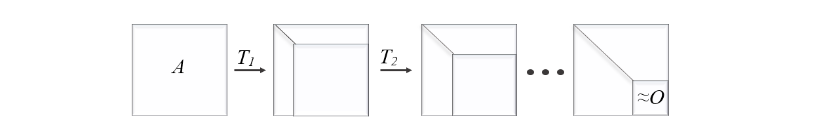

Izbor najvećeg po modulu pivot elementa obezbeđuje da se elementi celog donjeg dijagonalnog bloka iz koraka u korak približavaju nula matrici pokomponentno.

**Zadatak 1.** Date su matrice $A=\begin{bmatrix}1&1&5\\2&0&6\\1&2&7\end{bmatrix}$ i $B=\begin{bmatrix}1&-4&4\\4&-8&6\\0&-4&5\end{bmatrix}.$ 

a) Da li matrice $A$ i $B$ imaju jednake prostore kolona?

b) Da li matrice $A$ i $B$ imaju jednake prostore vrsta? 

c) Da li matrice $A$ i $B$ imaju jednaka desna jezgra?

d) Da li matrice $A$ i $B$ imaju jednaka leva jezgra?

**Rešenje:**

Proverićemo rangove matrica $A$ i $B$ primenom ugrađene funkcije NumPy Linalg biblioteke.

In [13]:
A=np.array([[1,1.,5],[2,0,6.],[1,2,7.]])
B=np.array([[1,-4.,4.],[4,-8,6.],[0,-4.,5.]])
print(np.linalg.matrix_rank(A))
print(np.linalg.matrix_rank(B))

2
2


Zaključujemo da matrice $A$ i $B$ mogu da imaju jednake neke od fundamentalnih potprostora. Zbog toga potražimo njihove LU faktorizacije.

In [17]:
PA, LA, UA=spl.lu(A)
PB, LB, UB=spl.lu(B)
print(PA@LA)
print(UA)
print(PB@LB)
print(UB)

[[0.5 0.5 1. ]
 [1.  0.  0. ]
 [0.5 1.  0. ]]
[[2. 0. 6.]
 [0. 2. 4.]
 [0. 0. 0.]]
[[0.25 0.5  1.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]]
[[ 4. -8.  6.]
 [ 0. -4.  5.]
 [ 0.  0.  0.]]


In [18]:
A-PA@LA@UA

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [19]:
B-PB@LB@UB

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Dobili smo sledeće trougaone faktorizacije matrica i faktorizacije punog ranga:
\begin{align}
A&=\begin{bmatrix}1/2&1/2&1\\1&0&0\\1/2&1&0\end{bmatrix}
\begin{bmatrix}2&0&6\\0&2&4\\0&0&0\end{bmatrix}=\begin{bmatrix}1/2&1/2\\1&0\\1/2&1\end{bmatrix}
\begin{bmatrix}2&0&6\\0&2&4\end{bmatrix},\\
B&=\begin{bmatrix}1/4&1/2&1\\1&0&0\\0&1&0\end{bmatrix}
\begin{bmatrix}7&-8&6\\0&-4&5\\0&0&0\end{bmatrix}
=\begin{bmatrix}1/4&1/2\\1&0\\0&1\end{bmatrix}
\begin{bmatrix}7&-8&6\\0&-4&5\end{bmatrix},\\
\end{align}

a) Za poređenje prostora kolona matrica $A$ i $B$ proverićemo rang matrice sastavljene od baznih kolona matrica $A$ i $B$.

In [20]:
L1=PA@LA
L2=PB@LB
ABkolone=np.hstack((L1[:,:2],L2[:,:2]))
print(ABkolone)
print(np.linalg.matrix_rank(ABkolone))

[[0.5  0.5  0.25 0.5 ]
 [1.   0.   1.   0.  ]
 [0.5  1.   0.   1.  ]]
2


Kako je ${\rm rang}(A)={\rm rang}(B)={\rm rang}([A|B])$ zaključujemo da su prostori kolona matrica $A$ i $B$ jednaki.

b) Za poređenje prostora vrsta matrica $A$ i $B$ proverićemo rang matrice sastavljene od baznih vrsta matrica $A$ i $B$.

In [21]:
ABvrste=np.vstack((UA[:2],UB[:2]))
print(ABvrste)
print(np.linalg.matrix_rank(ABvrste))

[[ 2.  0.  6.]
 [ 0.  2.  4.]
 [ 4. -8.  6.]
 [ 0. -4.  5.]]
3


Kako je ${\rm rang}(A^T)={\rm rang}(B^T)<{\rm rang}\left(\begin{bmatrix}A\\\hline B\end{bmatrix}\right)$ zaključujemo da prostori vrsta matrica $A$ i $B$ nisu jednaki.

c) S obzirom da su jezgra $\mathcal{N}(A)$ i $\mathcal{N}(B)$ ortogonalni prostori na $\mathcal{R}(A^T)$ i $\mathcal{R}(B^T)$ redom, zakljčujemo da se u slučaju matrica $A$ i $B$ ovi potprostori ne poklapaju. Da bismo ovo potvrdili možemo za poređenje jezgara matrica $A$ i $B$ da iskoristimo ugrađenu funkciju Pythona `null_space`. Ona vraća ortonormiranu bazu odgovarajućeg prostora. 

In [24]:
print(spl.null_space(A))
print(spl.null_space(B))

[[-0.80178373]
 [-0.53452248]
 [ 0.26726124]]
[[-0.52981294]
 [-0.66226618]
 [-0.52981294]]


d) Prostori kolona matrica $A$ i $B$ su jednaki pa su takve i njihove ortogonalne dopune, tj. leva jezgra ovih matrica $\mathcal{N}(A^T)$ i $\mathcal{N}(B^T).$ Da bismo ovo potvrdili koristimo `null_space`.

In [25]:
print(spl.null_space(A.T))
print(spl.null_space(B.T))

[[ 0.87287156]
 [-0.21821789]
 [-0.43643578]]
[[ 0.87287156]
 [-0.21821789]
 [-0.43643578]]


## Operacijska složenost Dulitlovog algoritma

Iterativna priroda LU faktorizacije ukazuje da poznavanje operacijske složenosti jednog koraka znači poznavanje operacijske složenosti svakog od koraka. Drugim rečima, ukoliko za jedan korak eliminacije nad kvadratnom matricom dimenzije $n$ se troši $f(n)$ operacija, za naredni korak biće potrebno $f(n-1)$ operacija, za naredni $f(n-2),$ itd., sve do poslednjeg koraka koji se sprovodi nad matricom dimenzije $2.$ Ovaj poslednji korak onda troši $f(2)$ operacija. Tada je ukupna operacijska (kombinatorna) složenost LU algoritma data sa
$$f(n)+f(n-1)+\dots+f(2)=\sum_{k=2}^nf(k).$$

Kako bismo došli do izraza $f(n)$ prebrojimo aritmetičke operacije potrebne za sprovođenje jednog koraka Dulitlove LU faktorizacije na matrici dimenzije $n.$ Osnovno pravilo u izvođenju i brojanju operacija je da se rezultati koji su unapred poznati ne izračunavaju. Drugim rečima, sve nule (ili neke druge vrednosti) koje unapred znamo ne izračunavamo.

Za praćenje broja operacija koristićemo standardno indeksiranje elemenata matrice.

- Izračunavanje jedne kolone matrice $L$ koristi $n-1$ deljenja  $\dfrac{a_{21}}{a_{11}},\dfrac{a_{31}}{a_{11}},\dots,\dfrac{a_{n1}}{a_{11}}\quad\Longrightarrow\quad n-1$ operacija deljenja; 
ili jedno deljenje $\dfrac{1}{a_{11}}$ i $n-1$ množenja.

- Promena vrednosti druge vrste matrice:
$$\begin{bmatrix} a_{21}&a_{22}&\dots&a_{2n}\end{bmatrix}\mapsto\begin{bmatrix} 0&a_{22}'&\dots&a_{2n}'\end{bmatrix}.$$
Izračunavanja, tj. promene vrednosti potrebno je izvesti samo nad elementima $a_{22},\dots,a_{2n}$ jer se $a_{21}$ bez izračunavanja može da postavi na vrednost 0. Sama transformacija uključuje: 
    
    * množenje pivot vrste (od drugog elementa) koeficijentom $l_{21}=\dfrac{a_{21}}{a_{11}}$
       $$l_{21}\begin{bmatrix}{\color{blue}a_{11}}& a_{12}&\dots&a_{1n}\end{bmatrix}\quad\Longrightarrow\quad n-1 \mbox{ množenja}.$$
    * oduzimanje ovakve pivot vrste od druge vrste   
    $$\begin{bmatrix} {\color{blue}a_{21}}&a_{22}&\dots&a_{2n}\end{bmatrix}-l_{21}\begin{bmatrix}{\color{blue}a_{11}}& a_{12}&\dots&a_{1n}\end{bmatrix}
    \quad\Longrightarrow\quad n-1 \mbox{ oduzimanja}.$$
- Promena vrednosti treće, četvrte, ..., $n-$te vrste koristi isti broj operacija.

Zaključujemo da je operacijska složenost jednog koraka LU faktorizacije određena izrazom:
$$f(n)=n-1+(n-1)(n-1+n-1)=2(n-1)^2+n=2n^2-3n+1.$$
Od toga $n-1+(n-1)^2=n^2-n$ operacija se troši na množenje ili deljenje. 
Rezultat možemo da proverimo upotrebom paketa za simbolička izračunavanja SymPy.

In [53]:
import sympy as sym
n=sym.Symbol('n')
sym.expand(n-1+(n-1)*(n-1+n-1))

2*n**2 - 3*n + 1

Ukupna operacijska složenost LU faktorizacije je $\mathcal{O}\left(\frac{2n^3}{3}\right)$
$$f(n)+f(n-1)+\dots+f(2)=\sum_{k=2}^nf(k)=\frac{2n^3}{3}-\frac{n^2}{2}-\frac{n}{6}.$$

In [54]:
k=sym.Symbol('k')
sym.Sum(2*k*k-3*k+1,(k,2,n)).doit()

2*n**3/3 - n**2/2 - n/6

Dulitlova LU faktorizacija dozvoljava ekonomizaciju u memorijskom prostoru. Umesto dve matrice $L$ i $U$ dimenzija $n\times n$ celokupni proces moguće je izvesti kroz transformacije samo jedne matrice dimenzije $n\times n.$ Pozicije elemenata sa poznatim vrednostima kao što su 0 i jedinice nije neophodno pamtiti. Takve pozicije se koriste za smeštaj drugih informacija faktorizacije. Šematski prikaz izlaza konačnog rezultata:
$$L=\begin{bmatrix}1&0&0&\dots&0\\l_{21}&1&0&\dots&0\\l_{31}&l_{32}&1&\dots&0\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
l_{n1}&l_{n2}&l_{n3}&\dots&1\end{bmatrix},\ 
U=\begin{bmatrix}u_{11}&u_{12}&u_{13}&\dots&u_{1n}\\
0&u_{22}&u_{23}&\dots&u_{2n}\\0&0&u_{33}&\dots&u_{3n}\\\vdots&\vdots&\vdots&\ddots&\vdots\\
0&0&0&\dots&u_{nn}\end{bmatrix}\ \mapsto\ 
L\,|\,U=\begin{bmatrix}u_{11}&u_{12}&u_{13}&\dots&u_{1n}\\
l_{21}&u_{22}&u_{23}&\dots&u_{2n}\\l_{31}&l_{32}&u_{33}&\dots&u_{3n}\\\vdots&\vdots&\vdots&\ddots&\vdots\\
l_{n1}&l_{n2}&l_{n3}&\dots&u_{nn}\end{bmatrix}$$

Na isti način i svaki korak faktorizacije štedi memorijski prostor. Pogledajmo na primeru jednog koraka.
\begin{align}
    L_1=\begin{bmatrix} 1&0&0&\dots&0\\
l_{21}&1&0&\dots&0\\ \vdots\\
l_{n1}&0&0&\dots&1\end{bmatrix},\ U_1=
\begin{bmatrix} a_{11}&a_{12}&\dots&a_{1n}\\
0&a_{22}'&\dots&a_{2n}'\\
&&\vdots&\\0&a_{n2}'&\dots&a_{nn}'\end{bmatrix}
\ \mapsto\ L_1\,|\,U_1=\begin{bmatrix} a_{11}&a_{12}&\dots&a_{1n}\\
l_{21}&a_{22}'&\dots&a_{2n}'\\
&&\vdots&\\l_{n1}&a_{n2}'&\dots&a_{nn}'\end{bmatrix}
\end{align}
Ovo je naročito korisno kod zamnene mesta vrsta usled izbora pivot elementa. Tada cele vrste matrice $L_k\,|\,U_k$ menjaju pozicije.

**Zadatak 2.** Odrediti LU faktorizaciju matrice $A=\begin{bmatrix} 1&2&-2&1\\
	2&6&-5&4\\-3&-10&11&-8\\4&14&-5&4\end{bmatrix}.$
    
**Rešenje:**    

In [18]:
A=np.array([[1,2.,-2,1],[2,6,-5,4],[-3,-10,11,-8],[4,14,-5,4.]])
P,L,U=spl.lu(A)
print("permutaciona matrica",P)
print("donje trougaona matrica",L)
print("gornje trougaona matrica",U)

permutaciona matrica [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
donje trougaona matrica [[ 1.          0.          0.          0.        ]
 [ 0.25        1.          0.          0.        ]
 [-0.75       -0.33333333  1.          0.        ]
 [ 0.5         0.66666667 -0.28571429  1.        ]]
gornje trougaona matrica [[ 4.         14.         -5.          4.        ]
 [ 0.         -1.5        -0.75        0.        ]
 [ 0.          0.          7.         -5.        ]
 [ 0.          0.          0.          0.57142857]]


In [20]:
A-P@L@U

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Funkcija SciPy biblioteke koja daje memorijski ekonomične rezultate je `lu_factor`.

In [19]:
spl.lu_factor(A)

(array([[ 4.        , 14.        , -5.        ,  4.        ],
        [ 0.25      , -1.5       , -0.75      ,  0.        ],
        [-0.75      , -0.33333333,  7.        , -5.        ],
        [ 0.5       ,  0.66666667, -0.28571429,  0.57142857]]),
 array([3, 3, 2, 3], dtype=int32))

Prethodna analiza dala je procenu operacijske složenosti prve faze Gausovog algoritma za rešenje kvadaratnog sistema linearnih jednačina. Potražićemo operacijsku složenost i druge faze Gausovog algoritma, tj faze zamene.

Neka je dat trougaoni sistem linearnih jednačina, $u_{ii}\neq0,$
$$	
\begin{array}{rl}
	u_{11}x_1+u_{12}x_2+u_{13}x_3+\dots+u_{1\,n-1}x_{n-1}+u_{1n}x_n&=b_1,\\
	u_{22}x_2+u_{23}x_3+\dots+u_{2\,n-1}x_{n-1}+u_{2n}x_n&=b_2,\\
		u_{33}x_3+\dots+u_{3\,n-1}x_{n-1}+u_{3n}x_n&=b_2,\\
		\vdots&\\
		u_{n-1\,n-1}x_{n-1}+u_{n-1\,n}x_n&=b_{n-1},\\
		u_{nn}x_n&=b_n.
	\end{array}$$
Prebrojaćemo aritmetičke operacije potrebne za rešavanje ovog sistema.

- Izračunavanje vrednosti nepoznate $x_n=\dfrac{b_n}{u_{nn}}$ troši jedno deljenje.
- $x_{n-1}=\dfrac{b_{n-1}-u_{n-1\,n}x_n}{u_{n-1\,n-1}},$ 1 deljenje, 1 množenje i 1 operacija $\pm.$
- $x_{n-2}=\dfrac{b_{n-2}-(u_{n-2\,n}x_n+u_{n-2\,n-1}x_{n-1})}{u_{n-2\,n-2}},$ 1 deljenje, 2 množenja i 2 operacije $\pm.$

$\vdots$
- $x_{n-k}=\dfrac{b_{n-k}-(u_{n-k\,n}x_n+u_{n-k\,n-1}x_{n-1}+\dots+u_{n-k\,n-k+1}x_{n-k+1})}{u_{n-k\,n-k}},$ koristi 1 deljenje, $k$ množenja i $k$ operacija $\pm.$

$\vdots$
- $x_{1}=\dfrac{b_{1}-(u_{1\,n}x_n+u_{1\,n-1}x_{n-1}+\dots+u_{1\,2}x_{2})}{u_{11}},$ 1 deljenje, $n-1$ množenja i $n-1$ operacija $\pm.$

Ukupan broj operacija svih koraka izračunavanja dat je narednom tabelom.
$$
	\begin{array}{c|c|c||c}
		{\rm Deljenja}&{\rm Množenja}&{\rm Sabiranja}/ &{\rm Ukupno}\\[6pt] 
        &&{\rm oduzimanja}&\\\hline\hline&&&\\
		n&\dfrac{n(n-1)}{2}&\dfrac{n(n-1)}{2}&n^2
	\end{array}
$$

Ukoliko je poznata trougaona faktorizacija sistema jednačina $Ax=b\Longleftrightarrow LUx=b,$ rešavanje polaznog sistema možemo svesti na rešavanje dva trougaona sistema.
Uvedimo smenu $y=Ux.$ Tada je 
$$Ax=b\quad\Longleftrightarrow\quad Ly=b,\ Ux=y.$$ 
Broj potrebnih operacija za rešavanje dva trougaona sistema linearnih jednačina je $2n^2.$ Ukoliko je neka od matrica $L$ ili $U$ sa jedinicama na glavnoj dijagonali štedi se na operaciji deljenja, pa je broj potrebnih operacija za rešavanje takvog sistema jednak $2n^2-n=\mathcal{O}(2n^2).$

**Primer 5** Uporedićemo vremena rešavanja $100$ sistema linearnih jednačina $Ax=b_k,\ k=\overline{1,100}$ sa i bez trougaone faktorizacije.

In [2]:
n=1023
I=np.eye(n)
A = rndm.randn(n,n)+200*I
b = np.ones(n)

In [7]:
start = timer()
lu, piv = spl.lu_factor(A)
for k in range(1,101):
    x = spl.lu_solve((lu, piv), b/k)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")    

Vreme izracunavanja:  0.18661430000065593 sec


In [8]:
start = timer()
for k in range(1,101):
    x = np.linalg.solve(A, b/k)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  4.27398820000235 sec


**Задатак 3.** На основу $LU$ факторизације матрице $A\in\mathcal{M}_{n\times n}$ одредити инверзну матрицу $A^{-1}$ решавањем низа система једначина 
$$LUx=e_i,\quad i=1,\dots,n$$
где су $e_i$ вектори канонске базе простора $\mathbb{R}^n.$

In [34]:
spl.lu_solve((lu, piv), I)

array([[ 4.98251439e-03,  3.06077841e-05, -5.41913985e-05, ...,
        -8.88051982e-06, -1.19335377e-05, -6.63916706e-05],
       [ 3.26747642e-05,  4.99164369e-03,  5.12175264e-05, ...,
         3.56777223e-05,  2.24441726e-05, -8.56483423e-06],
       [-1.27094923e-05, -4.01898650e-05,  5.00700884e-03, ...,
        -6.99255530e-06, -8.46312008e-07,  1.63407032e-05],
       ...,
       [-3.43211919e-05,  4.12632426e-05,  3.48431245e-05, ...,
         4.99817478e-03,  2.32245202e-05,  2.15462833e-05],
       [ 4.64723134e-07,  5.61198874e-05,  1.56655709e-05, ...,
        -1.21226166e-05,  4.99046073e-03, -3.02104742e-05],
       [-1.95246977e-05,  9.69321225e-06,  2.74999795e-05, ...,
         4.29699021e-06, -2.78572012e-05,  5.00711351e-03]])

## LDU faktorizacija

Postoji izvesna nesimetričnost u Dultlovoj faktorizaciji matrice, tu mislim na vrednosti dijagonalnih elemenata matrica faktora. Postavljanje jedinica na dijagonalu gornje trougaone matrice $U$ u faktorizaciji $A=LU$ se lako postiže transformacijom vrsta matrice $U:$
$$\begin{bmatrix}u_{11}&u_{12}&u_{13}&\dots&u_{1n}\\
0&u_{22}&u_{23}&\dots&u_{2n}\\
0&0&u_{33}&\dots&u_{3n}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
0&0&0&\dots&u_{nn}\end{bmatrix}
=\begin{bmatrix}u_{11}&0&0&\dots&0\\ 0&u_{22}&0&\dots&0\\0&0&u_{33}&\dots&0\\\vdots&\vdots&\vdots&\ddots&\vdots\\
0&0&0&\dots&u_{nn}\end{bmatrix}
\begin{bmatrix}1&\frac{u_{12}}{u_{11}}&\frac{u_{13}}{u_{11}}&\dots&\frac{u_{1n}}{u_{11}}\\
0&1&\frac{u_{23}}{u_{22}}&\dots&\frac{u_{2n}}{u_{22}}\\0&0&1&\dots&\frac{u_{3n}}{u_{33}}\\\vdots&\vdots&\vdots&\ddots&\vdots\\
0&0&0&\dots&1\end{bmatrix}.
$$
Tako Dulitlova faktorizacija lako postaje LDU dekompozicija matrice:
$$A=\begin{bmatrix}1&0&0&\dots&0\\l_{21}&1&0&\dots&0\\l_{31}&l_{32}&1&\dots&0\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
l_{n1}&l_{n2}&l_{n3}&\dots&1\end{bmatrix}
\begin{bmatrix}u_{11}&0&0&\dots&0\\ 0&u_{22}&0&\dots&0\\0&0&u_{33}&\dots&0\\\vdots&\vdots&\vdots&\ddots&\vdots\\
0&0&0&\dots&u_{nn}\end{bmatrix}
\begin{bmatrix}1&\frac{u_{12}}{u_{11}}&\frac{u_{13}}{u_{11}}&\dots&\frac{u_{1n}}{u_{11}}\\
0&1&\frac{u_{23}}{u_{22}}&\dots&\frac{u_{2n}}{u_{22}}\\0&0&1&\dots&\frac{u_{3n}}{u_{33}}\\\vdots&\vdots&\vdots&\ddots&\vdots\\
0&0&0&\dots&1\end{bmatrix}.
$$

Na osnovu jedinstvenosti Dulitlove dekompozicije bez izbora pivot elementa $A=LU,$ sledi da je i LDU dekompozicija matrice jedinstvena.

Ukoliko za regularnu simetričnu matricu $A$ važi da je $A=LDU,$  onda je $L=U^T.$ Zaista, zbog simetričnosti matrice $A$ važi:
$$LDU=(LDU)^T=U^TD^TL^T=U^TDL^T.$$
Kako je LDU dekompozicija jednoznačno određena, potvrđujemo da je $L=U^T.$ Zaljučujemo da za simetrične matrice važi $LDL^T$ dekompozicija.

**Primer 6.** Potražimo LDU faktorizaciju bez izbora pivot elementa simetrične matrice $A=\begin{bmatrix}1&3&4\\3&1&3\\4&3&-1\end{bmatrix}.$ Na osnovu nje možemo da odredimo $LDL^T$ dekompoziciju matrice $A.$

In [35]:
A=np.array([[1.,3.,4.],[3,1,3],[4,3,-1]])
U=A.copy()
L=np.eye(3)
for i in range(3-1):
    L[i+1:,i]=U[i+1:,i]/U[i,i]
    U[i+1:,:]-=np.outer(L[i+1:,i],U[i,:])

print(L)
print(U)    

[[1.    0.    0.   ]
 [3.    1.    0.   ]
 [4.    1.125 1.   ]]
[[ 1.     3.     4.   ]
 [ 0.    -8.    -9.   ]
 [ 0.     0.    -6.875]]


In [36]:
D=np.diag(U)
U=U/D.reshape(3,1)

In [37]:
print(L)
print(U) 
print(D)

[[1.    0.    0.   ]
 [3.    1.    0.   ]
 [4.    1.125 1.   ]]
[[ 1.     3.     4.   ]
 [-0.     1.     1.125]
 [-0.    -0.     1.   ]]
[ 1.    -8.    -6.875]


Ugrađena funkcija za  $LDL^T$ dekompoziciju simetrične matrice nalazi se u `scipy.linalg` modulu. Za $LDL^T$ dekompoziciju sa izborom pivot elementa teži se očuvanju simetričnosti celokupne strukture. Svaka permutacija vrsta praćena je odgovarajućom permutacijom kolona. Konačan izraz dekompozicije tada glasi
$$PAP^T=LDL^T.$$
Doduše, ova naredba vraća blok dijagonalnu matricu $D$ u određenim situacijama.

In [38]:
l, d, perm = spl.ldl(A)

print(l)
print(l[perm])
print(d)

[[1.         0.         0.        ]
 [0.88235294 0.52941176 1.        ]
 [0.         1.         0.        ]]
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.88235294 0.52941176 1.        ]]
[[ 1.          4.          0.        ]
 [ 4.         -1.          0.        ]
 [ 0.          0.         -3.23529412]]


In [42]:
A-l@d@l.T

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Pristup $LDL^T$ dekompozicijom može se primeniti i u slučaju singularnih simetričnih matrica. Kod ovakvih matrica u postupku $LDL^T$ dekompozicije kada se pojavi pivot element jednak nuli, odgovarajući dijagonalni element matrice $D$ se postavlja da bude nula. Dijagonalna matrica $D$ svojim nenula elementima registruje rang faktorisane matrice.

**Primer 7.** Potražimo $LDL^T$ dekompoziciju simetrične matrica $A=\begin{bmatrix}1&1&1&1\\1&2&-1&2\\
1&-1&5&-1\\1&2&-1&4\end{bmatrix}.$

In [39]:
A=np.array([[1.,1.,1,1.],[1,2,-1,2],[1,-1,5,-1],[1,2,-1,4]])
l, d, perm = spl.ldl(np.tril(A))
print(l)
print(l[perm])
print(d)

[[ 1.   0.   0.   0. ]
 [ 1.  -0.5  1.   0. ]
 [ 1.   1.   0.   0. ]
 [ 1.  -0.5  0.   1. ]]
[[ 1.   0.   0.   0. ]
 [ 1.   1.   0.   0. ]
 [ 1.  -0.5  1.   0. ]
 [ 1.  -0.5  0.   1. ]]
[[1. 0. 0. 0.]
 [0. 4. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]]


In [40]:
A-l@d@l.T

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

**Zadatak 4.** LU dekompozicija bez izbora pivot elementa simetrične matrice $A$ kao rezultat dala je matricu $U=\begin{bmatrix} 2&4&-2\\0&1&1\\0&0&3\end{bmatrix}.$ Odrediti $A.$

**Rešenje:**

Na osnovu LU dekompozicije simetrične matrice $A$ dobija se njena $LDL^T$ dekompozicija. Dijagonalnu matricu $D$ čine dijagonalni elementi matrice $U,$ a $L^T=D^{-1}U.$ 
\begin{align}
    &D=\begin{bmatrix} 2&0&0\\0&1&0\\0&0&3\end{bmatrix},
    \qquad L^T=\begin{bmatrix} 1&2&-1\\0&1&1\\0&0&1\end{bmatrix},\\
    &A=LDL^T=LU=\begin{bmatrix} 1&0&0\\2&1&0\\-1&1&1\end{bmatrix}
    \begin{bmatrix} 2&4&-2\\0&1&1\\0&0&3\end{bmatrix}=
    \begin{bmatrix} 2&4&-2\\4&9&-3\\-2&-3&6\end{bmatrix}.
\end{align}

 Kada simetrična matrica $A$ ima $LDL^T$ dekompoziciju kod koje su dijagonalni elementi $D=diag(d_1,\dots,d_n)$ svi pozitivni, za matricu $A$ kažemo da ima tzv. Čoleski dekompoziciju $A=LL^T.$ 
 Označimo $D^{1/2}=diag(\sqrt{d_1},\dots,\sqrt{d_n}).$ Tada 
 $$A=(LD^{1/2})(LD^{1/2})^T$$
 predstavlja dekompoziciju Čoleskog, tj. proizvod jedne donjetrougaone matrice i njene transponovane matrice.

**Primer 8.** Za simetričnu matricu 
$A=\begin{bmatrix} a_{11}&a_{21}&a_{31}\\
	a_{21}&a_{22}&a_{32}\\a_{31}&a_{32}&a_{33}\end{bmatrix}$ 
dekompozicija Čoleskog koristi jednu donje trougaonu matricu 
$L=\begin{bmatrix} l_{11}&0&0\\ l_{21}&l_{22}&0\\l_{31}&l_{32}&l_{33}\end{bmatrix}.$
Tada uslov $A=LL^T$ postaje 
	$$\begin{bmatrix} a_{11}&a_{21}&a_{31}\\
	a_{21}&a_{22}&a_{32}\\a_{31}&a_{32}&a_{33}\end{bmatrix}=
	\begin{bmatrix} l_{11}&0&0\\l_{21}&l_{22}&0\\l_{31}&l_{32}&l_{33}\end{bmatrix}
	\begin{bmatrix} l_{11}&l_{21}&l_{31}\\
	0&l_{22}&l_{32}\\0&0&l_{33}\end{bmatrix}=
	\begin{bmatrix} l_{11}^2&l_{11}l_{21}&l_{11}l_{31}\\
	l_{11}l_{21}&l_{21}^2+l_{22}^2&l_{21}l_{31}+l_{22}l_{32}\\
	l_{11}l_{31}&l_{21}l_{31}+l_{22}l_{32}&l_{31}^2+l_{32}^2+l_{33}^2\end{bmatrix}.$$
Poređenjem dijagonalnih elemenata dve matrice zaključujemo da je prvi neophodan uslov  za realizaciju dekompozicije Čoleskog $a_{kk}>0.$
Izjednačavnjem elemenata u prvoj koloni matrica $A$ i $LL^T$ nalazimo
	$$\begin{array}{lll}
	a_{11}=l_{11}^2& \Longrightarrow& l_{11}=\sqrt{a_{11}}\,,\\[8pt]
	a_{21}=l_{11}l_{21}& \Longrightarrow& l_{21}=\dfrac{a_{21}}{l_{11}}\,,\\[8pt]
	a_{31}=l_{11}l_{31}& \Longrightarrow& l_{31}=\dfrac{a_{31}}{l_{11}}\,.
	\end{array}$$ 
Izjednačavanje elemenata nastavljamo duž ostalih kolona matrica $A$ i $LL^T.$
	$$\begin{array}{lll}
		a_{22}=l_{21}^2+l_{22}^2&\Longrightarrow&l_{22}=\sqrt{a_{22}-l_{21}^2}\,,\\[10pt]
		a_{32}=l_{21}l_{31}+l_{22}l_{32}&\Longrightarrow&
		l_{32}=\dfrac{a_{32}-l_{21}l_{31}}{l_{22}},\\[10pt]
		a_{33}=l_{31}^2+l_{32}^2+l_{33}^2&\Longrightarrow&
		l_{33}=\sqrt{a_{33}-l_{31}^2-l_{32}^2}\,.
	\end{array}$$
Uslovi pozitivnosti glase: $a_{11}>0,$
	$$\begin{array}{l}
	a_{22}-l_{21}^2>0\ \Longleftrightarrow\ a_{22}-\dfrac{a_{21}^2}{a_{11}}
	=\dfrac{a_{11}a_{22}-a_{21}^2}{a_{11}}>0\ \Longrightarrow\
	a_{11}a_{22}-a_{21}^2>0\\
	\qquad\Longleftrightarrow 
    \begin{vmatrix} a_{11}&a_{12}\\a_{12}&a_{22}\end{vmatrix}>0,\\
	a_{33}-l_{31}^2-l_{32}^2>0\ \Longleftrightarrow\ a_{33}-\dfrac{a_{31}^2}{a_{11}}
	-\dfrac{\left(\dfrac{a_{11}a_{32}-a_{21}a_{31}}{a_{11}}\right)^2}
	{\dfrac{a_{11}a_{22}-a_{21}^2}{a_{11}}}>0\\
	\qquad\Longrightarrow\ a_{11}a_{22}a_{33}-a_{12}^2a_{33}-a_{13}^2a_{22}-a_{11}a_{23}^2+2a_{12}a_{13}a_{23}>0\\
	\qquad\Longleftrightarrow 
    \begin{vmatrix} a_{11}&a_{12}&a_{13}\\
	a_{12}&a_{22}&a_{23}\\a_{13}&a_{23}&a_{33}\end{vmatrix}>0.
	\end{array}$$
    

Da bi simetrična matrica imala Čoleski dekompoziciju neophodno je da izrazi pod kvadratnim korenom budu nenegativni. Ovo je u tesnoj vezi sa veoma bitnom osobinom nekih simetričnih matrica.
Formule za dekompoziciju Čoleskog u opštem slučaju glase:
$$l_{ij}=\begin{cases}
\sqrt{a_{ii}^2-\big\|\begin{bmatrix} l_{i1}&l_{i2}&\dots&l_{i\,i-1}\end{bmatrix}\big\|^2}&,i=j,\\
\dfrac{a_{ij}}{l_{jj}}-\dfrac1{l_{jj}}\begin{bmatrix} l_{i1}&l_{i2}&\dots&l_{i\,j-1}\end{bmatrix}
\begin{bmatrix} l_{j1}\\l_{j2}\\ \dots\\l_{j\,j-1}\end{bmatrix}&,i>j,\\
0&,i<j.
\end{cases}.$$

Odredićemo $LL^T$ dekompoziciju matrice 
$A=\begin{bmatrix}4&-2&2\\-2&2&-4\\2&-4&11\end{bmatrix}.$
\begin{align}
    l_{11}&=\sqrt{a_{11}}=\sqrt4=2,\\
    l_{21}&=\dfrac{a_{21}}{l_{11}}=\dfrac{-2}{2}=-1,\\
    l_{31}&=\dfrac{a_{31}}{l_{11}}=2,\\
    l_{22}&=\sqrt{a_{22}-l_{21}^2}=1,\\
    l_{32}&=\dfrac{a_{32}-l_{21}l_{31}}{l_{22}}=-4,\\
    l_{33}&=\sqrt{a_{33}-l_{31}^2-l_{32}^2}=11.
\end{align}
Dobili smo da je $A=LL^T,$ za $L=\begin{bmatrix} 2&0&0\\-1&1&0\\1&-3&1\end{bmatrix}.$

In [41]:
A=np.array([[4.,-2,2.],[-2,2,-4],[2,-4,11]])
U = spl.cholesky(A)
U.T@U

array([[ 4., -2.,  2.],
       [-2.,  2., -4.],
       [ 2., -4., 11.]])

In [42]:
U

array([[ 2., -1.,  1.],
       [ 0.,  1., -3.],
       [ 0.,  0.,  1.]])

**Zadatak 5.** Dekompozicija Čoleskog matrice $A$ kao rezultat dala je matricu $L=\begin{bmatrix} 1&0&0\\1&2&0\\1&2&3\end{bmatrix}.$ Odrediti $\det(A),$ a zatim i samu matricu $A.$

**Rešenje:** Dekompozicija Čoleskog simetrične matrice $A$ je faktorizacija oblika $A=LL^T.$ Na osnovu toga lako dobijamo traženo:
$$\det(A)=\det(LL^T)=\det(L)\det(L^T)=\det(L)^2=6^2=36.$$

In [43]:
L=np.array([[1,0,0],[1,2,0],[1,2,3]])
A=L@L.T
print(A)

[[ 1  1  1]
 [ 1  5  5]
 [ 1  5 14]]
